# SIFT & Feature Matching

> Indented block



![Status](https://img.shields.io/static/v1.svg?label=Status&message=Finished&color=green)

In this tutorial, we will learn about:

* Extracting SIFT feature with OpenCV
* Performing features matching  

  






### Connect Google Drive to Colab


In [10]:
import cv2
import matplotlib.  pyplot as plt

def cv2_imshow(img):
    plt.axis("off")
    plt.imshow(cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB))
    plt.show()

# Extracting SIFT Feature 

SIFT was proposed by Prof. D.Lowe, University of British Columbia in his paper, Distinctive Image Features from Scale-Invariant Keypoints, which extract keypoints and compute its descriptors.

There are mainly four steps involved in SIFT algorithm.

### 1. Scale-space Extrema Detection
SIFT algorithm uses Difference of Gaussians which is obtained as the difference of Gaussian blurring of an image with two different σ, let it be σ and kσ. This process is done for different octaves of the image in Gaussian Pyramid. It is represented in below image:

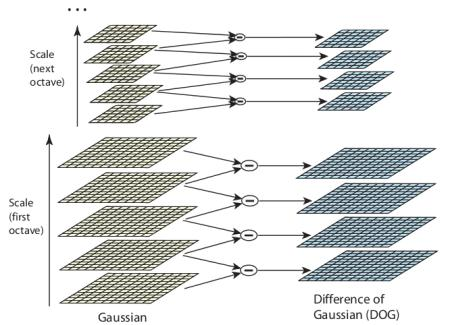


Once this DoG are found, images are searched for local extrema over scale and space. For eg, one pixel in an image is compared with its 8 neighbours as well as 9 pixels in next scale and 9 pixels in previous scales. If it is a local extrema, it is a potential keypoint. It basically means that keypoint is best represented in that scale. It is shown in below image:

### 2. Keypoint Localization
Once potential keypoints locations are found, they have to be refined to get more accurate results. They used Taylor series expansion of scale space to get more accurate location of extrema, and if the intensity at this extrema is less than a threshold value (0.03 as per the paper), it is rejected. 

### 3. Orientation Assignment
Now an orientation is assigned to each keypoint to achieve invariance to image rotation. A neighbourhood is taken around the keypoint location depending on the scale, and the gradient magnitude and direction is calculated in that region. An orientation histogram with 36 bins covering 360 degrees is created (It is weighted by gradient magnitude and gaussian-weighted circular window with σ equal to 1.5 times the scale of keypoint). The highest peak in the histogram is taken and any peak above 80% of it is also considered to calculate the orientation. It creates keypoints with same location and scale, but different directions. It contribute to stability of matching.


### 4. Keypoint Descriptor
Now keypoint descriptor is created. A 16x16 neighbourhood around the keypoint is taken. It is divided into 16 sub-blocks of 4x4 size. For each sub-block, 8 bin orientation histogram is created. So a total of 128 bin values are available. It is represented as a vector to form keypoint descriptor. In addition to this, several measures are taken to achieve robustness against illumination changes, rotation etc.

This is a summary of SIFT algorithm. For more details and understanding, reading the original paper is highly recommended.


## SIFT in OpenCV




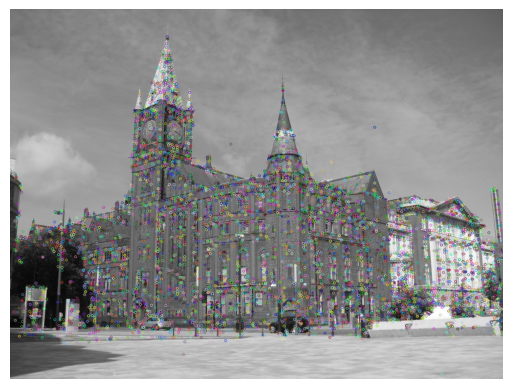

In [11]:
import numpy as np
import cv2
import matplotlib.  pyplot as plt

img = cv2.imread('./victoria.png') ## Change the image path if you place your image in different folder

# convert color image to greyscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# construct a SIFT object 
sift = cv2.SIFT_create()

# detect the keypoints
kp = sift.detect(gray,None)

# visualization
img_kp = cv2.drawKeypoints(gray,kp,img)
cv2_imshow(img_kp)

# Keypoint Matching
Keypoints between two images are matched by identifying their nearest neighbours. But in some cases, the second closest-match may be very near to the first. It may happen due to noise or some other reasons. In that case, ratio of closest-distance to second-closest distance is taken. If it is greater than 0.8, they are rejected. It eliminates around 90% of false matches while discards only 5% correct matches, as per the paper.


### Brute-Force Matcher
Brute-Force matcher is simple. It takes the descriptor of one feature in first set and is matched with all other features in second set using some distance calculation. And the closest one is returned.

BF matcher is implemented in **cv2.BFMatcher()** of OpenCV.

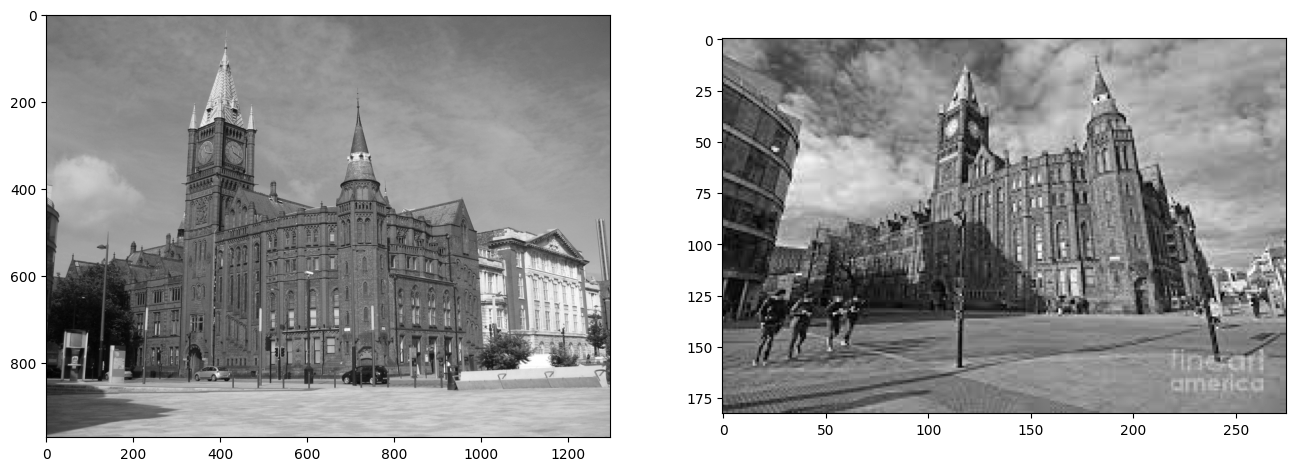

In [12]:
import cv2 
import matplotlib.pyplot as plt

# read images
img1 = cv2.imread('./victoria.png') 
img2 = cv2.imread('./victoria2.jpg') 

# convert to greyscale
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# plot the images
figure, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].imshow(img1, cmap='gray')
ax[1].imshow(img2, cmap='gray')



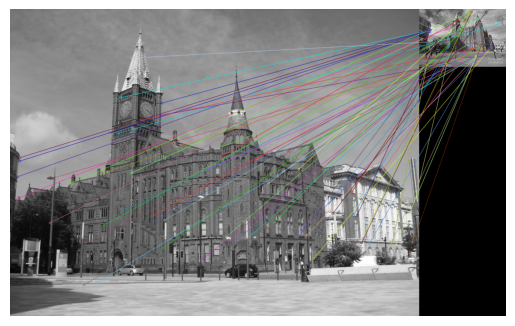

In [13]:

# create sift object
sift = cv2.SIFT_create()

keypoints1, descriptors1 = sift.detectAndCompute(img1,None)
keypoints2, descriptors2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])


img_result = cv2.drawMatchesKnn(img1, keypoints1, img2, keypoints2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
#plt.imshow(img_result),plt.show()
cv2_imshow(img_result)

# Self Practice
All students are recommended to readd and understand the implementation of **sift.detectAndCompute()** a self practice. 